In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import math
goal = 0.8
weight = 0.0
input = 1.1
alpha = 1.0
errors = []
for i in range(20):
    pred = weight * input
    error = (pred - goal) ** 2
    errors.append(error)
    delta = (pred - goal) * input
    weight = weight - (delta * alpha)
    print(error, delta, pred, weight)
    if abs(pred - goal) < 0.0001:
        break

0.6400000000000001 -0.8800000000000001 0.0 0.8800000000000001
0.02822400000000005 0.1848000000000002 0.9680000000000002 0.6951999999999999
0.0012446784000000064 -0.0388080000000001 0.76472 0.734008
5.4890317439999896e-05 0.008149679999999992 0.8074088 0.72585832
2.4206629991042546e-06 -0.0017114328000000902 0.798444152 0.7275697528
1.0675123826048965e-07 0.0003594008880000055 0.80032672808 0.727210351912
4.707729607278605e-09 -7.54741864799291e-05 0.7999313871032001 0.7272858260984799


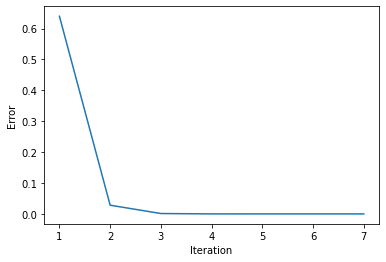

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [16]:
#something more complex - an example from Grokking Deep Learning by Andrew Trask ---> Great book
import numpy as np
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input_record = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

for iteration in range(20):
    prediction = input_record.dot(weights)
    error = (goal_prediction - prediction) ** 2
    delta = prediction - goal_prediction
    weights = weights - (alpha * (input_record * delta))

    print("Error:" + str(error) + " Prediction:" + str(prediction))   

Error:0.03999999999999998 Prediction:-0.19999999999999996
Error:0.025599999999999973 Prediction:-0.15999999999999992
Error:0.01638399999999997 Prediction:-0.1279999999999999
Error:0.010485759999999964 Prediction:-0.10239999999999982
Error:0.006710886399999962 Prediction:-0.08191999999999977
Error:0.004294967295999976 Prediction:-0.06553599999999982
Error:0.002748779069439994 Prediction:-0.05242879999999994
Error:0.0017592186044416036 Prediction:-0.04194304000000004
Error:0.0011258999068426293 Prediction:-0.03355443200000008
Error:0.0007205759403792803 Prediction:-0.02684354560000002
Error:0.0004611686018427356 Prediction:-0.021474836479999926
Error:0.0002951479051793508 Prediction:-0.01717986918399994
Error:0.00018889465931478573 Prediction:-0.013743895347199997
Error:0.00012089258196146188 Prediction:-0.010995116277759953
Error:7.737125245533561e-05 Prediction:-0.008796093022207963
Error:4.951760157141604e-05 Prediction:-0.007036874417766459
Error:3.169126500570676e-05 Prediction:-0.0

In [18]:
#input = streetlights[0] # [1,0,1]
#goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

for iteration in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input_record = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        prediction = input_record.dot(weights)
        
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input_record * delta))
        print("Prediction:" + str(prediction))
    print("Error:" + str(error_for_all_lights) + "\n")

Prediction:-0.19999999999999996
Prediction:-0.19999999999999996
Prediction:-0.5599999999999999
Prediction:0.6160000000000001
Prediction:0.17279999999999995
Prediction:0.17552
Error:2.6561231104

Prediction:0.14041599999999999
Prediction:0.3066464
Prediction:-0.34513824
Prediction:1.006637344
Prediction:0.4785034751999999
Prediction:0.26700416768
Error:0.9628701776715985

Prediction:0.213603334144
Prediction:0.5347420299776
Prediction:-0.26067345110016
Prediction:1.1319428845096962
Prediction:0.6274723921901568
Prediction:0.25433999330650114
Error:0.5509165866836797

Prediction:0.20347199464520088
Prediction:0.6561967149569552
Prediction:-0.221948503950995
Prediction:1.166258650532124
Prediction:0.7139004922542389
Prediction:0.21471099528371604
Error:0.36445836852222424

Prediction:0.17176879622697283
Prediction:0.7324724146523222
Prediction:-0.19966478845083285
Prediction:1.1697769945341199
Prediction:0.7719890116601171
Prediction:0.17297997428859369
Error:0.2516768662079895

Predictio

In [31]:
import numpy as np

weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )
errors = []
for iteration in range(40):
    error_per_iteration = 0
    for idx in range(len(walk_vs_stop)):
        input_data = streetlights[idx]
        actual = walk_vs_stop[idx]
        predicted = input_data.dot(weights)
        error = (predicted - actual) ** 2
        error_per_iteration += error
        delta = predicted - actual
        weights = weights - (alpha * input_data * delta)
        print("Prediction: " + str(predicted))
    print("Error: " + str(error_per_iteration))
    errors.append(error)
   

Prediction: -0.19999999999999996
Prediction: -0.19999999999999996
Prediction: -0.5599999999999999
Prediction: 0.6160000000000001
Prediction: 0.17279999999999995
Prediction: 0.17552
Error: 2.6561231104
Prediction: 0.14041599999999999
Prediction: 0.3066464
Prediction: -0.34513824
Prediction: 1.006637344
Prediction: 0.4785034751999999
Prediction: 0.26700416768
Error: 0.9628701776715985
Prediction: 0.213603334144
Prediction: 0.5347420299776
Prediction: -0.26067345110016
Prediction: 1.1319428845096962
Prediction: 0.6274723921901568
Prediction: 0.25433999330650114
Error: 0.5509165866836797
Prediction: 0.20347199464520088
Prediction: 0.6561967149569552
Prediction: -0.221948503950995
Prediction: 1.166258650532124
Prediction: 0.7139004922542389
Prediction: 0.21471099528371604
Error: 0.36445836852222424
Prediction: 0.17176879622697283
Prediction: 0.7324724146523222
Prediction: -0.19966478845083285
Prediction: 1.1697769945341199
Prediction: 0.7719890116601171
Prediction: 0.17297997428859369
Error

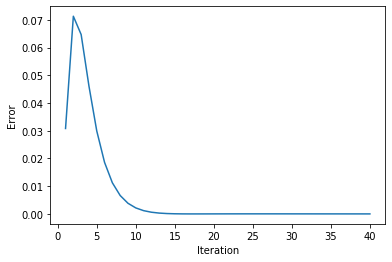

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()